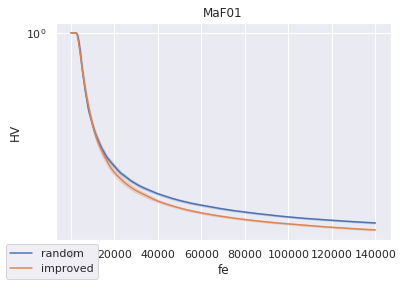

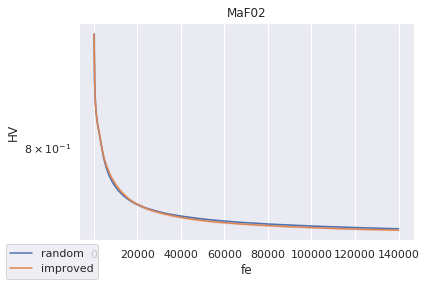

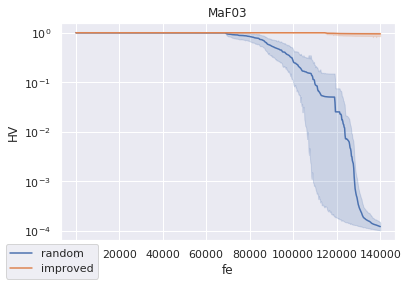

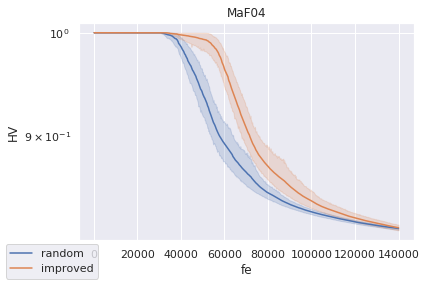

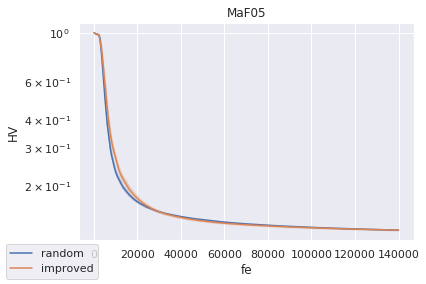

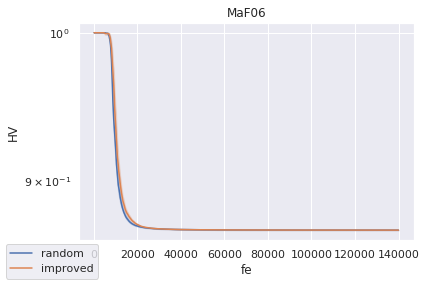

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

probs=["MaF01", "MaF02", "MaF03", "MaF04", "MaF05", "MaF06"]#, "MaF07", "MaF08", "MaF09", "MaF10", "MaF11", "MaF12", "MaF13"]
    #, "MaF14", "MaF15"]
pop_size = 210
runs = [str(i) for i in range(0, 20)]

for prob in probs:
    fig, ax = plt.subplots()
    ax.set(yscale='log')
    
    path="../MaFMethodology/5/hhco/HHCORandom/%s/output/"%(prob)
    df_list=[]
    for run in runs:
        df = pd.read_csv(path+"hvimprovement."+run, names=["HV"])
        df['fe'] = np.arange(len(df))
        df['it'] = df['fe'] // pop_size
        df['run'] = run
        df_list.append(df)
    df = pd.concat(df_list)
    df['HV'] = 1-df['HV']
    df_mean = df.groupby(['it', 'run']).mean().reset_index()
    sns.lineplot(x="fe", y="HV", data=df_mean).set_title(prob)
    
    path="../MaFMethodology/5/hhco/HHCOR2/%s/output/"%(prob)
    df_list=[]
    for run in runs:
        df = pd.read_csv(path+"hvimprovement."+run, names=["HV"])
        df['fe'] = np.arange(len(df))
        df['it'] = df['fe'] // pop_size
        df['run'] = run
        df_list.append(df)
    df = pd.concat(df_list)
    df['HV'] = 1-df['HV']
    df_mean = df.groupby(['it', 'run']).mean().reset_index()
    sns.lineplot(x="fe", y="HV", data=df_mean).set_title(prob)
    
    
    fig.legend(labels=['random','improved'], loc=3)
    plt.show()
